In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import nltk
nltk.download('averaged_perceptron_tagger')
  
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.
from tqdm import tqdm, trange

['ner_dataset.csv']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\My PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [145]:
input_data = pd.read_csv("input/ner_dataset.csv", encoding="latin1")
#input_data
input_data['Word'] = input_data['Word'].astype(str)
input_data['Pos'] = input_data['Word'].apply(lambda x: nltk.pos_tag([x])[0][1])
input_data = input_data.fillna(method="ffill")
input_data.head(5)

,Word,Tag,Pos
0,Adobe,O,NN
1,has,O,VBZ
2,released,O,VBN
3,security,O,NN
4,updates,O,NNS


In [146]:
s=[]
t=[]
l=[]
word=[]
Tag=[]
Lab=[]
w=""
j=0
i=1
for y in input_data.Word:
    if(y!='EOS'):
        word.append(y)
        Tag.append(input_data.Tag[j])
        Lab.append(input_data.Pos[j])
        
        
        s=i
        t.append(s)
    else:
        i=i+1
        
    j=j+1
        
t[-1]

#input_data['Sentence #']=t
        
len(Tag)

          

47467

In [147]:
input_data.Tag.value_counts(normalize=False)
from collections import Counter
counts = Counter(Tag)
print(Tag)

['O', 'O', 'O', 'O', 'O', 'O', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'VERSION', 'MODIFIER', 'MODIFIER', 'MODIFIER', 'O', 'EXPLOIT-TARGET', 'O', 'EXPLOIT-TARGET', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'VERSION', 'O', 'O', 'O', 'O', 'EXPLOIT-TARGET', 'O', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'VERSION', 'O', 'O', 'O', 'O', 'EXPLOIT-TARGET', 'EXPLOIT-TARGET', 'O', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'VERSION', 'O', 'O', 'O', 'O', 'EXPLOIT-TARGET', 'VERSION', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ATTACK-PATTERN', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'VULNERABILITY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SOFTWARE', 'SOFTWARE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ATTACK-PATTERN', 'O', 'O', 'O', 'O', 'VULNERABILITY', 'O', 'O', 'SOFTWARE', 'O', 'O', 'SOFTWARE', 'SOFTWARE', 'O', 'EXPLOIT-TARGET', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'VU

In [148]:
df=pd.DataFrame()
df['Sentence #']=t
df['Word']=word
df['Tag']=Tag
df['POS']=Lab

df.head(15)

,Sentence #,Word,Tag,POS
0,1,Adobe,O,NN
1,1,has,O,VBZ
2,1,released,O,VBN
3,1,security,O,NN
4,1,updates,O,NNS
5,1,for,O,IN
6,1,Adobe,SOFTWARE,NN
7,1,Flash,SOFTWARE,NN
8,1,Player,SOFTWARE,NN
9,1,11.5.502.146,VERSION,CD


In [149]:
type(t)
df = df.fillna(method = 'ffill')

In [150]:
# This is a class te get sentence. The each sentence will be list of tuples with its tag and pos.
class sentence(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        self.empty = False
        agg = lambda s : [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(),
                                                       s['POS'].values.tolist(),
                                                       s['Tag'].values.tolist())]
        self.grouped = self.df.groupby("Sentence #").apply(agg)
        self.sentences = [s for s in self.grouped]
        
    def get_text(self):
        try:
            s = self.grouped[' '.format(self.n_sent)]
            self.n_sent +=1
            return s
        except:
            return None

In [151]:
getter = sentence(df)
sentences = [" ".join([s[0] for s in sent]) for sent in getter.sentences]
sentences[0]

'Adobe has released security updates for Adobe Flash Player 11.5.502.146 and earlier versions for Windows and Macintosh Adobe Flash Player 11.2.202.261 and earlier versions for Linux nan Adobe Flash Player 11.1.115.36 and earlier versions for Android 4.x and Adobe Flash Player 11.1.111.31 and earlier versions for Android 3.x and 2 .'

In [152]:
sent = getter.sentences
sent

[[('Adobe', 'NN', 'O'),
  ('has', 'VBZ', 'O'),
  ('released', 'VBN', 'O'),
  ('security', 'NN', 'O'),
  ('updates', 'NNS', 'O'),
  ('for', 'IN', 'O'),
  ('Adobe', 'NN', 'SOFTWARE'),
  ('Flash', 'NN', 'SOFTWARE'),
  ('Player', 'NN', 'SOFTWARE'),
  ('11.5.502.146', 'CD', 'VERSION'),
  ('and', 'CC', 'MODIFIER'),
  ('earlier', 'RBR', 'MODIFIER'),
  ('versions', 'NNS', 'MODIFIER'),
  ('for', 'IN', 'O'),
  ('Windows', 'NNS', 'EXPLOIT-TARGET'),
  ('and', 'CC', 'O'),
  ('Macintosh', 'NNP', 'EXPLOIT-TARGET'),
  ('Adobe', 'NN', 'SOFTWARE'),
  ('Flash', 'NN', 'SOFTWARE'),
  ('Player', 'NN', 'SOFTWARE'),
  ('11.2.202.261', 'CD', 'VERSION'),
  ('and', 'CC', 'O'),
  ('earlier', 'RBR', 'O'),
  ('versions', 'NNS', 'O'),
  ('for', 'IN', 'O'),
  ('Linux', 'NN', 'EXPLOIT-TARGET'),
  ('nan', 'NN', 'O'),
  ('Adobe', 'NN', 'SOFTWARE'),
  ('Flash', 'NN', 'SOFTWARE'),
  ('Player', 'NN', 'SOFTWARE'),
  ('11.1.115.36', 'CD', 'VERSION'),
  ('and', 'CC', 'O'),
  ('earlier', 'RBR', 'O'),
  ('versions', 'NNS', 'O')

In [153]:
# Number of data points passed in each iteration
batch_size = 64 
# Passes through entire dataset
epochs = 8
# Maximum length of review
max_len = 75 
# Dimension of embedding vector
sentences = getter.sentences
embedding = 40

In [154]:
#Getting unique words and labels from data
words = list(df['Word'].unique())
tags = list(df['Tag'].unique())
# Dictionary word:index pair
# word is key and its value is corresponding index
word_to_index = {w : i + 2 for i, w in enumerate(words)}
word_to_index["UNK"] = 1
word_to_index["PAD"] = 0

# Dictionary lable:index pair
# label is key and value is index.
tag_to_index = {t : i + 1 for i, t in enumerate(tags)}
tag_to_index["PAD"] = 0

idx2word = {i: w for w, i in word_to_index.items()}
idx2tag = {i: w for w, i in tag_to_index.items()}

In [155]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Converting each sentence into list of index from list of tokens
X = [[word_to_index[w[0]] for w in s] for s in sentences]

# Padding each sequence to have same length  of each word
X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index["PAD"])

In [156]:
# Convert label to index
y = [[tag_to_index[w[2]] for w in s] for s in sentences]

# padding
y = pad_sequences(maxlen = max_len, sequences = y, padding = "post", value = tag_to_index["PAD"])

In [157]:

import pandas as pd
import numpy as np

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import LSTM, Dense, TimeDistributed, Embedding, Bidirectional
from keras.models import Model, Input
from keras_contrib.layers import CRF
from keras.callbacks import ModelCheckpoint

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import f1_score
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
from keras.preprocessing.text import text_to_word_sequence
import pickle
num_tag = df['Tag'].nunique()
# One hot encoded labels
y = [to_categorical(i, num_classes = num_tag + 1) for i in y]

In [158]:
df.head(10)

,Sentence #,Word,Tag,POS
0,1,Adobe,O,NN
1,1,has,O,VBZ
2,1,released,O,VBN
3,1,security,O,NN
4,1,updates,O,NNS
5,1,for,O,IN
6,1,Adobe,SOFTWARE,NN
7,1,Flash,SOFTWARE,NN
8,1,Player,SOFTWARE,NN
9,1,11.5.502.146,VERSION,CD


In [159]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
                                                   

In [160]:
print("Size of training input data : ", X_train.shape)
print("Size of training output data : ", np.array(y_train).shape)
print("Size of testing input data : ", X_test.shape)
print("Size of testing output data : ", np.array(y_test).shape)

Size of training input data :  (1373, 75)
Size of training output data :  (1373, 75, 13)
Size of testing input data :  (243, 75)
Size of testing output data :  (243, 75, 13)


In [161]:
# Let's check the first sentence before and after processing.
print('*****Before Processing first sentence : *****\n', ' '.join([w[0] for w in sentences[0]]))
print('*****After Processing first sentence : *****\n ', X[0])

*****Before Processing first sentence : *****
 Adobe has released security updates for Adobe Flash Player 11.5.502.146 and earlier versions for Windows and Macintosh Adobe Flash Player 11.2.202.261 and earlier versions for Linux nan Adobe Flash Player 11.1.115.36 and earlier versions for Android 4.x and Adobe Flash Player 11.1.111.31 and earlier versions for Android 3.x and 2 .
*****After Processing first sentence : *****
  [ 2  3  4  5  6  7  2  8  9 10 11 12 13  7 14 11 15  2  8  9 16 11 12 13
  7 17 18  2  8  9 19 11 12 13  7 20 21 11  2  8  9 22 11 12 13  7 20 23
 11 24 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]


In [162]:
# First label before and after processing.
print('*****Before Processing first sentence : *****\n', ' '.join([w[2] for w in sentences[0]]))
print('*****After Processing first sentence : *****\n ', y[0])

*****Before Processing first sentence : *****
 O O O O O O SOFTWARE SOFTWARE SOFTWARE VERSION MODIFIER MODIFIER MODIFIER O EXPLOIT-TARGET O EXPLOIT-TARGET SOFTWARE SOFTWARE SOFTWARE VERSION O O O O EXPLOIT-TARGET O SOFTWARE SOFTWARE SOFTWARE VERSION O O O O EXPLOIT-TARGET EXPLOIT-TARGET O SOFTWARE SOFTWARE SOFTWARE VERSION O O O O EXPLOIT-TARGET VERSION O O O
*****After Processing first sentence : *****
  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0

In [163]:

num_tags = df['Tag'].nunique()
# Model architecture
input = Input(shape = (max_len,))
model = Embedding(input_dim = len(words) + 2, output_dim = embedding, input_length = max_len)(input)
model = Bidirectional(LSTM(units = 50, return_sequences=True, recurrent_dropout=0.1))(model)
model = TimeDistributed(Dense(50, activation="relu"))(model)
crf = CRF(num_tags+1)  # CRF layer
out = crf(model)  # output

model = Model(input, out)
model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy])

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 75, 40)            189400    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 75, 100)           36400     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 75, 50)            5050      
_________________________________________________________________
crf_4 (CRF)                  (None, 75, 13)            858       
Total params: 231,708
Trainable params: 231,708
Non-trainable params: 0
_________________________________________________________________


In [164]:
checkpointer = ModelCheckpoint(filepath = 'model.h5',
                       verbose = 0,
                       mode = 'auto',
                       save_best_only = True,
                       monitor='val_loss')

In [165]:

history = model.fit(X_train, np.array(y_train), batch_size=batch_size, epochs=epochs,
                    validation_split=0.1, callbacks=[checkpointer])

Train on 1235 samples, validate on 138 samples
Epoch 1/8
1235/1235 [==============================] - 7s 6ms/step - loss: 1.2522 - crf_viterbi_accuracy: 0.6175 - val_loss: 0.5642 - val_crf_viterbi_accuracy: 0.8539
Epoch 2/8
1235/1235 [==============================] - 4s 3ms/step - loss: 0.4895 - crf_viterbi_accuracy: 0.8770 - val_loss: 0.4307 - val_crf_viterbi_accuracy: 0.8942
Epoch 3/8
1235/1235 [==============================] - 4s 3ms/step - loss: 0.3718 - crf_viterbi_accuracy: 0.9077 - val_loss: 0.3603 - val_crf_viterbi_accuracy: 0.8938
Epoch 4/8
1235/1235 [==============================] - 3s 2ms/step - loss: 0.3215 - crf_viterbi_accuracy: 0.9136 - val_loss: 0.3161 - val_crf_viterbi_accuracy: 0.9069
Epoch 5/8
1235/1235 [==============================] - 3s 2ms/step - loss: 0.2875 - crf_viterbi_accuracy: 0.9171 - val_loss: 0.2771 - val_crf_viterbi_accuracy: 0.9084
Epoch 6/8
1235/1235 [==============================] - 3s 2ms/step - loss: 0.2527 - crf_viterbi_accuracy: 0.9196 - val

In [166]:
history.history.keys()

dict_keys(['val_loss', 'val_crf_viterbi_accuracy', 'loss', 'crf_viterbi_accuracy'])

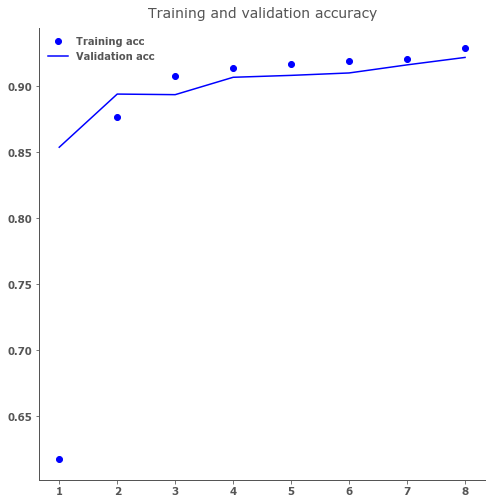

In [167]:
acc = history.history['crf_viterbi_accuracy']
val_acc = history.history['val_crf_viterbi_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize = (8, 8))
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

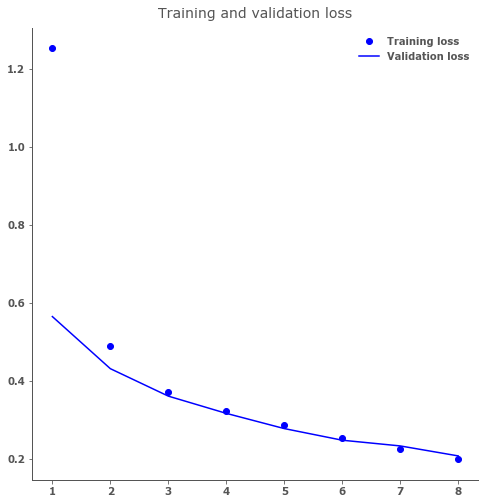

In [168]:

plt.figure(figsize = (8, 8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [169]:
# Evaluation
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test_true = np.argmax(y_test, -1)

In [170]:

# Convert the index to tag
y_pred = [[idx2tag[i] for i in row] for row in y_pred]
y_test_true = [[idx2tag[i] for i in row] for row in y_test_true]

In [171]:
report = flat_classification_report(y_pred=y_pred, y_true=y_test_true)
print(report)

                  precision    recall  f1-score   support

  ATTACK-PATTERN       0.10      0.02      0.03       299
COURSE-OF-ACTION       0.00      0.00      0.00        41
  EXPLOIT-TARGET       0.00      0.00      0.00       199
            FILE       0.00      0.00      0.00         7
        MODIFIER       0.00      0.00      0.00       129
               O       0.86      0.99      0.92      5343
             PAD       1.00      1.00      1.00     11681
        SOFTWARE       0.46      0.32      0.38       503
         VERSION       0.00      0.00      0.00         5
   VULNERABILITY       0.00      0.00      0.00        18

        accuracy                           0.94     18225
       macro avg       0.24      0.23      0.23     18225
    weighted avg       0.91      0.94      0.92     18225



In [172]:
# At every execution model picks some random test sample from test set.
i = np.random.randint(0,X_test.shape[0]) # choose a random number between 0 and len(X_te)b
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_test[i], -1)

print("Sample number {} of {} (Test Set)".format(i, X_test.shape[0]))
# Visualization
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_test[i], true, p[0]):
    if w != 0:
        print("{:15}: {:5} {}".format(words[w-2], idx2tag[t], idx2tag[pred]))

Sample number 228 of 243 (Test Set)
Word           ||True ||Pred
A              : O     O
critical       : O     O
vulnerability  : O     O
has            : O     O
been           : O     O
identified     : O     O
in             : O     O
Adobe@Reader@X@: O     O
(              : O     O
10.1.1         : O     O
)              : O     O
nan            : SOFTWARE O
and            : O     O
earlier        : O     O
versions       : O     O
for            : O     O
Windows        : O     O
nan            : EXPLOIT-TARGET O
and            : O     O
Macintosh      : O     O
nan            : EXPLOIT-TARGET O
nan            : O     O
Adobe          : SOFTWARE SOFTWARE
Reader         : SOFTWARE SOFTWARE
9.4.6          : SOFTWARE SOFTWARE
and            : O     O
earlier        : O     O
9              : O     O
.              : O     O


In [173]:
with open('word_to_index.pickle', 'wb') as f:
    pickle.dump(word_to_index, f)

with open('tag_to_index.pickle', 'wb') as f:
    pickle.dump(tag_to_index, f)